# Presentation

In [1]:
# Import standard modules
import logging

# Import third-party modules
import pandas as pd
import matplotlib.pyplot as plt

# Import local modules
import common

# Set variables
DB_FILE = common.obtain_root_path() / "data" / "etraveli.db"
LIMITS = None#(28800, 63000) # Use `None` to disable limits
LOGGING_LEVEL = logging.INFO

# Configure logging
logging.basicConfig(format="[EDA1 %(asctime)s] - %(message)s", level=LOGGING_LEVEL)

In [2]:
# Load data
errands_df, orders_df = common.load_data(DB_FILE, LIMITS)

# Column transformations
errands_df['is_test_errand'] = errands_df['is_test_errand'].astype(bool)
errands_df['order_id'] = errands_df['order_id'].astype(str)
orders_df['is_changed'] = orders_df['is_changed'].astype(bool)
orders_df['is_canceled'] = orders_df['is_canceled'].astype(bool)

# Filter out test errands
errands_df = errands_df[~errands_df['is_test_errand']]

# Print data shapes
logging.info(f"Errands dataframe shape: {errands_df.shape}")
logging.info(f"Orders dataframe shape: {orders_df.shape}")

[EDA1 2024-12-26 14:02:46,021] - Errands dataframe shape: (2680892, 8)
[EDA1 2024-12-26 14:02:46,063] - Orders dataframe shape: (6300206, 22)


In [3]:
# Load preprocessed ML data
errands_ml = pd.read_parquet("data/errands_ml.parquet")
orders_ml = pd.read_parquet("data/orders_ml.parquet")

# Apply limits if required by taking the first LIMITS rows
if LIMITS is not None:
    errands_ml = errands_ml.head(LIMITS[0])
    orders_ml = orders_ml.head(LIMITS[1])

# Print data shapes
logging.info(f"Errands ML dataframe shape: {errands_ml.shape}")
logging.info(f"Orders ML dataframe shape: {orders_ml.shape}")

[EDA1 2024-12-26 14:03:11,281] - Errands ML dataframe shape: (2680892, 21)
[EDA1 2024-12-26 14:03:11,287] - Orders ML dataframe shape: (6300206, 22)


In [4]:
errands_df.head()

,order_id,errand_id,created,errand_category,errand_type,errand_action,errand_channel,is_test_errand
0,4607513832,52497975,2023-12-31 08:59:49,6: Payment questions,2: Payment not conf - CC,1: Info provided,1: Phone In,False
1,4607634481,52502839,2023-12-31 11:36:31,6: Payment questions,3: Payment not conf - bank,1: Info provided,1: Phone In,False
2,4607731297,52520705,2024-01-01 00:02:32,6: Payment questions,6: No order but charged / charged twice / rese...,1: Info provided,19: Chat,False
3,4607745598,52520962,2024-01-01 00:23:39,9: Other services / products,3: Other airline services,7: Other,19: Chat,False
5,4607746357,52521048,2024-01-01 00:31:27,2: Cancellation / refund,1: Ask about cxnl rules,3: Not cxnl reservation,1: Phone In,False


In [5]:
orders_df.head()

,order_id,pnr,order_created_at,booking_system,site_country,brand,order_amount,currency,revenue,partner,...,client_entry_type,booking_system_source_type,origin_country,destination_country,journey_type_id,is_changed,is_canceled,cancel_reason,change_reason,count_errands
0,4607745402,VVNVMF,2024-01-01 00:00:01,System A,Italy,Brand A,824.68,Euro,9.09,Partner A,...,b2bapi,GDS,Italy,Italy,One-way,False,False,Undefined,Initial - Not Changed,0
1,4607744269,8WJRXE,2024-01-01 00:00:04,System A,Australia,Brand A,1760.80,Australian Dollar,14.74,Partner B,...,metasearch,GDS,Australia,Australia,Round-trip,True,False,Undefined,Schedule change: Primary Alternative,0
2,4607745343,EN91QW,2024-01-01 00:00:05,System B,Brazil,Brand B,977.50,Brazilian Real,58.94,Partner C,...,metasearch,API,Brazil,Brazil,Round-trip,False,False,Undefined,Initial - Not Changed,2
3,4607745473,PPY1VQ,2024-01-01 00:00:10,System B,USA,Brand A,61.78,US Dollar,10.09,Partner A,...,b2bapi,API,USA,USA,Round-trip,False,False,Undefined,Initial - Not Changed,0
4,4607745421,75NN7W,2024-01-01 00:00:14,System C,Germany,Brand A,1756.50,Euro,9.09,Partner A,...,b2bapi,NDC,Germany,Germany,OpenJawSingleOrigin,False,False,Undefined,Initial - Not Changed,1


In [6]:
print(errands_ml.head().to_string())

   errand_id    order_id             created    weekday time_slot  order_diff       errand_category                 errand_type                     errand_action   errand_channel  pnr_size booking_system brand partner  order_amount customer_group_type device client_entry_type origin_country journey_type_id  errand_order
0   53746711  4600000000 2024-01-23 06:55:18    Tuesday         A    0.145278  6: Payment questions                    1: Price                  1: Info provided      1: Phone In         2              B     D       D        701.30              SINGLE     PC        metasearch         Canada         One-way             1
1   53791996  4600000009 2024-01-23 23:45:23    Tuesday         D   16.987500          1: Rebooking  9: Incorrect department-SC  1: Interaction transferred to FL  34: SC Phone in         1              D     A       A        652.28              SINGLE     PC            b2bapi      Australia      Round-trip             1
2   53792547  4600000009 2024-01-2

In [7]:
print(orders_ml.head().to_string())

     order_id  pnr_size booking_system brand partner currency  order_amount customer_group_type         device client_entry_type booking_system_source_type origin_country      journey_type_id  is_changed  is_canceled cancel_reason                         change_reason  count_errands    order_created_at weekday time_slot  zero_errands
0  4607745402         1              A     A       A      EUR        758.71              SINGLE             PC            b2bapi                        GDS          Italy              One-way       False        False     Undefined                 Initial - Not Changed              0 2024-01-01 00:00:01  Monday         A          True
1  4607744269         1              A     A       B      AUD       2676.42              SINGLE         iPhone        metasearch                        GDS      Australia           Round-trip        True        False     Undefined  Schedule change: Primary Alternative              0 2024-01-01 00:00:04  Monday         A       

In [8]:
# Query `orders_df` for the number of orders with zero, one, two or three and more errands
# Categorize the errands without modifying the original dataframe
errand_category = pd.cut(
    orders_df['count_errands'],
    bins=[-1, 0, 1, 2, float('inf')],  # Define bins
    labels=['0', '1', '2', '3+']        # Labels for bins
)

# Calculate absolute counts
absolute_counts = errand_category.value_counts().sort_index()

# Calculate relative counts
relative_counts = errand_category.value_counts(normalize=True).sort_index()

# Combine absolute and relative counts into a single DataFrame
result = pd.DataFrame({
    'Absolute Count': absolute_counts,
    'Relative Count': relative_counts
})

result



,Absolute Count,Relative Count
count_errands,,
0,5275067,0.837285
1,457594,0.072632
2,220452,0.034991
3+,347093,0.055092


Key Insights and Recommendations:
  - Focus on Preventing Errands
    - The high proportion of no-errand orders (83.7%) highlights that the system is already efficient. Analyze the characteristics of these orders to identify best practices and replicate them across more scenarios.
  - Streamline Single-Errand Resolution
    - Single errands represent the largest chunk of support-required cases (7.3%). Enhancing efficiency in resolving these (e.g., through automation or better routing) could significantly reduce support workload.
  - Reduce Complexity in Multi-Errand Cases
    - Orders requiring 3+ errands (5.5%) are likely consuming disproportionate resources. Investigate these cases to identify common patterns or root causes, such as recurring issues or unclear communication.
  - Invest in Escalation Management for 2+ Errands
     - Orders requiring two or more errands (9.0% combined) might involve more complex resolutions. Enhanced training or support tools for agents handling these could reduce the number of follow-ups and errands per order.

In [9]:
# Calculating both absolute and relative frequencies for the 'errand_category' column
absolute_counts = errands_df['errand_category'].value_counts()
relative_counts = errands_df['errand_category'].value_counts(normalize=True)

top_categories_combined = pd.DataFrame({
    'Absolute Frequency': absolute_counts,
    'Relative Frequency (%)': relative_counts * 100
})

print(top_categories_combined.to_string())

                                             Absolute Frequency  Relative Frequency (%)
errand_category                                                                        
2: Cancellation / refund                                 650659               24.270243
1: Rebooking                                             624523               23.295343
18: Schedule change                                      457044               17.048206
5: Document & travel info                                324104               12.089409
4: Change of name & passenger info                       176551                6.585532
43: No response                                          136635                5.096625
7: Baggage                                               131324                4.898519
6: Payment questions                                      46100                1.719577
8: Seating                                                42053                1.568620
9: Other services / products    

Key Insights:
  - Top 3 Categories Dominate:
    - Cancellation/Refund (24%), Rebooking (23%), and Schedule Change (17%) together account for 64% of all errands.
    - Recommendation: Focus on automation, self-service tools, and improved communication for these high-volume categories.
  - Self-Service Potential:
     - Categories like Document & Travel Info (12%), Change of Name & Passenger Info (6%), and No Response (5%) could be ripe for self-service solutions to reduce manual workload.
  - Rare Categories:
      - While rare, categories like Ancillary Team, FL Fraud Errands Process, and Legal Claims likely require specialized training or dedicated support teams.

In [10]:
# Group by journey type and calculate metrics
journey_insights = orders_df.groupby('journey_type_id').agg(
    avg_order_amount=('order_amount', 'mean'), # To confirm it is right -- should be more expensive
    avg_contacts=('count_errands', 'mean'),
    total_orders=('order_id', 'count')
).sort_values(by='avg_contacts', ascending=False)

print(journey_insights)


                          avg_order_amount  avg_contacts  total_orders
journey_type_id                                                       
MultiStop                    823734.104027      1.097801         29376
OpenJawDouble                300028.762283      0.904374          2698
OpenJawSingleOrigin          341949.055236      0.808335         66131
OpenJawSingleDestination     136225.434876      0.608363         24990
Round-trip                    57436.886100      0.565599       2347358
One-way                       50600.144863      0.379743       3829653


Key Insights:
  - Revenue vs. Complexity Tradeoff:
    - MultiStop journeys generate the highest revenue but also require the most support, while one-way journeys have low revenue and minimal complexity.
    - Recommendation: Invest resources proportionally to the revenue and complexity of each journey type.
  - High-Volume Types:
    - Round-trip and one-way journeys dominate in terms of total orders (6,177,011 combined, ~98% of all journeys).
    - Recommendation: Focus on automation and scalability for these high-frequency journey types.
  - Mid-Tier Complexity:
    - OpenJaw journeys (Single Origin, Single Destination, and Double) are moderately complex and account for ~95,819 orders (~1.5% of total orders).
    - Recommendation: Enhance support processes for these journeys, such as clear pre-journey instructions and self-service for changes.
  - Special Handling for MultiStop Journeys:
    - Although MultiStop orders are rare (29,376 orders, ~0.5%), they generate significantly higher revenue and require more contacts.
    - Recommendation: Create a dedicated support team or VIP program for MultiStop journeys to maximize customer satisfaction and retention.

In [11]:
# by country
country_insights = orders_df.groupby('site_country').agg(
    avg_contacts=('count_errands', 'mean'),
    total_orders=('order_id', 'count')
).sort_values(by='avg_contacts', ascending=False)

print(country_insights.to_string())


                      avg_contacts  total_orders
site_country                                    
Nigeria                   1.066103          1301
Israel                    0.931476         37870
China                     0.733293          4938
Korea                     0.730353        100016
Argentina                 0.711602         10059
Brazil                    0.670975        242003
Uruguay                   0.646610          1180
New Zealand               0.630020         27015
Canada                    0.614398        176882
Peru                      0.605183          8837
Cuba                      0.603476         14443
Jordan                    0.575094          3742
Turkey                    0.556123         30353
India                     0.541962         74400
Australia                 0.530646        246884
Qatar                     0.523852         20292
Macau                     0.507645           654
United Kingdom            0.505753        693560
Philippines         

- Europe: Countries like Germany (0.38), France (0.41), and Italy (0.39) exhibit low contact frequencies, suggesting efficient processes in mature markets.
  - Action: Maintain focus on scalability and automation for routine issues.

- Asia: Countries like China (0.73), India (0.54), and Vietnam (0.47) have higher contact frequencies, possibly due to language or cultural nuances.
  - Action: Invest in localized support systems with cultural and linguistic adaptability.
- Latin America: Countries like Brazil (0.67), Argentina (0.71), and Colombia (0.50) show moderate to high contact frequencies, reflecting a mix of simple and complex support needs.
  -Action: Improve proactive communication and self-service tools.

In [12]:
# Absolute and relative counts for channel per category
channel_per_category = errands_ml.groupby(['errand_category', 'errand_channel']).size().reset_index(name='absolute_count')
category_totals = channel_per_category.groupby('errand_category')['absolute_count'].transform('sum')
channel_per_category['relative_count'] = channel_per_category['absolute_count'] / category_totals

# Get the top 3 channels for each errand_category
top_channel_per_category = (
    channel_per_category.sort_values(['errand_category', 'absolute_count'], ascending=[True, False])
    .groupby('errand_category')
    .head(3)
)

# Absolute and relative counts for category per channel
category_per_channel = errands_ml.groupby(['errand_channel', 'errand_category']).size().reset_index(name='absolute_count')
channel_totals = category_per_channel.groupby('errand_channel')['absolute_count'].transform('sum')
category_per_channel['relative_count'] = category_per_channel['absolute_count'] / channel_totals

# Get the top 3 categories for each errand_channel
top_category_per_channel = (
    category_per_channel.sort_values(['errand_channel', 'absolute_count'], ascending=[True, False])
    .groupby('errand_channel')
    .head(3)
)

In [13]:
# Display the results
print("Top 3 Channels per Category:")
print(top_channel_per_category.to_string())

Top 3 Channels per Category:
                                 errand_category   errand_channel  absolute_count  relative_count
1                              10: Force Majeure      1: Phone In            3575        0.531836
0                              10: Force Majeure         19: Chat            1312        0.195180
3                              10: Force Majeure  34: SC Phone in            1052        0.156501
6                               11: Site support         19: Chat             974        0.420553
7                               11: Site support      1: Phone In             901        0.389033
8                               11: Site support       2: Mail In             359        0.155009
12                          13: Language problem      1: Phone In            5007        0.586643
14                          13: Language problem  34: SC Phone in            3132        0.366960
13                          13: Language problem       2: Mail In             225        

In [14]:
print("\nTop 3 Categories per Channel:")
print(top_category_per_channel.to_string())


Top 3 Categories per Channel:
      errand_channel            errand_category  absolute_count  relative_count
14          19: Chat   2: Cancellation / refund          296312        0.253110
5           19: Chat               1: Rebooking          295182        0.252145
35          19: Chat  5: Document & travel info          165929        0.141737
47       1: Phone In               1: Rebooking          253429        0.297965
56       1: Phone In   2: Cancellation / refund          231808        0.272544
78       1: Phone In  5: Document & travel info          116586        0.137074
97        2: Mail In   2: Cancellation / refund           81640        0.371055
89        2: Mail In               1: Rebooking           36788        0.167202
113       2: Mail In  5: Document & travel info           33718        0.153249
122  34: SC Phone in        18: Schedule change          130044        0.691668
129  34: SC Phone in   2: Cancellation / refund           19940        0.106055
123  34: 

- Insights from "Top 3 Channels per Category":
  - Force Majeure Errands
    - Dominated by Phone In (53%), followed by Chat (19%) and SC Phone In (15%).
    - Insight: Given the reliance on Phone In, training for handling urgent/emotional Force Majeure cases should be emphasized for this channel.
  - Language Problems
    - Heavily managed via Phone In (59%) and SC Phone In (37%). Mail In plays a minor role (2%).
    - Insight: Phone-based channels are critical for resolving language issues—focus efforts on training multilingual agents for these channels.
  - Rebooking Requests
     - Chat (47%) and Phone In (41%) handle the majority of these requests, with Mail In (6%) being minimal.
     - Insight: Equal investment in Chat and Phone In efficiency for rebooking will have a high impact.
  - Cancellation/Refund
      - Chat leads (46%), followed by Phone In (36%) and Mail In (12%).
      - Insight: Chat automation and optimized workflows can greatly improve handling for these high-volume errands.
  - Schedule Changes
      - SC Phone In (28%) and SC Chat (27%) dominate, with regular Chat (18%) as a secondary channel.
      - Insight: Dedicate resources to SC Phone In and SC Chat for schedule changes, as these are highly used for such issues.
  - Document & Travel Info
      - Chat (51%) is preferred, with Phone In (36%) and Mail In (10%) secondary.
      - Insight: Automation for documentation queries via Chat could ease workload on Phone In.
  - Baggage-Related Errands
      - Chat (52%) leads, followed by Phone In (36%) and Mail In (9%).
      - Insight: Since baggage concerns may involve real-time updates, consider enhancements to Chat for quick resolution.

- Insights from "Top 3 Categories per Channel":
  - Chat's Dominance
    - Top Categories: Cancellation/Refund (25%), Rebooking (25%), and Document & Travel Info (14%).
    - Insight: Chat's efficiency makes it the go-to channel for high-volume, straightforward errands—optimize it for these tasks.
  - Phone In's Core Use
      - Top Categories: Rebooking (30%), Cancellation/Refund (27%), and Document & Travel Info (14%).
      - Insight: Focus Phone In resources on complex, emotionally charged tasks that require personal interaction.
  - Mail In's Niche Role
      - Top Categories: Cancellation/Refund (37%), Rebooking (17%), and Document & Travel Info (15%).
      - Insight: Use Mail In as a supplementary channel for cases requiring extensive documentation.
  - SC Phone In's Specialization
      - Top Categories: Schedule Changes (69%), Cancellation/Refund (11%), and Rebooking (10%).
      - Insight: SC Phone In is critical for high-stakes changes—ensure agents here are trained for escalated cases.
  - SC Mail In's Focus
      - Top Categories: Schedule Changes (89%), Cancellation/Refund (7%), and Rebooking (3%).
      - Insight: Mail-based support is most valuable for high-detail schedule adjustments.
  - SC Chat's Efficiency
      - Top Categories: Schedule Changes (67%), "No Response" (12%), and Rebooking (9%).
      - Insight: SC Chat handles a wide range of cases effectively, with opportunities for further optimization in these areas.

General Recommendations:
  - Invest in Chat Automation
    - Chat is the most frequently used channel for high-volume errands. Enhance chatbot capabilities for handling simple queries like rebooking and cancellations.
  - Strengthen Phone In Training
    - Phone In is a critical channel for complex and emotional errands such as language issues and schedule changes. Focus on agent training and support tools.
  - Leverage Mail In for Documentation
    - While niche, Mail In is significant for detailed documentation-heavy tasks. Streamline these processes for better efficiency.


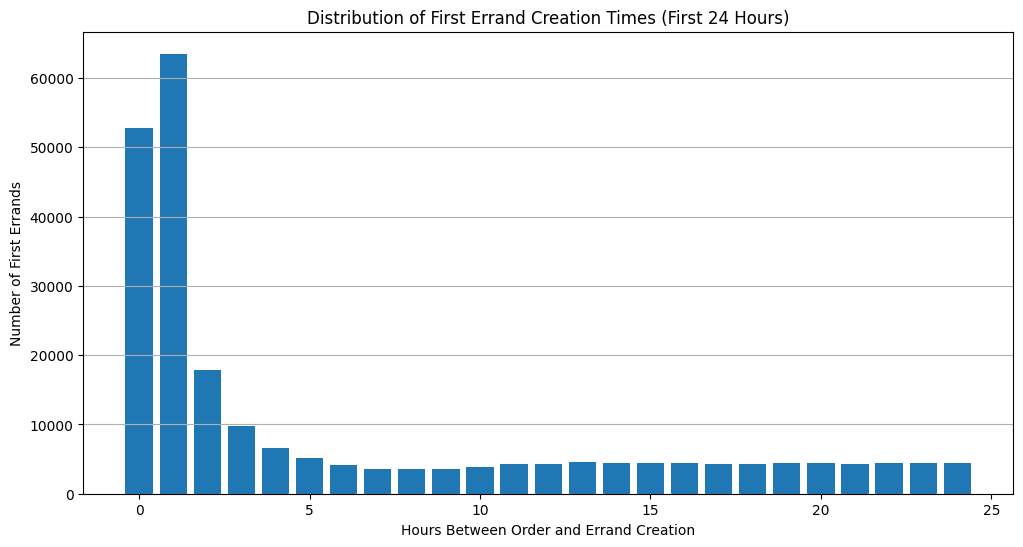

    Hours After Order  Number of First Errands  Cumulative Number  Cumulative Percentage
0                 0.0                    52834              52834              22.386909
1                 1.0                    63508             116342              49.296622
2                 2.0                    17836             134178              56.854121
3                 3.0                     9794             143972              61.004051
4                 4.0                     6610             150582              63.804851
5                 5.0                     5117             155699              65.973034
6                 6.0                     4134             159833              67.724700
7                 7.0                     3617             163450              69.257301
8                 8.0                     3498             166948              70.739479
9                 9.0                     3601             170549              72.265301
10               10.0

In [15]:
# Remove rows with negative order_diff values
errands_ml = errands_ml[errands_ml['order_diff'] >= 0]

# Filter only the first errand for each order
first_errand = errands_ml.sort_values(by=['order_id', 'order_diff']).drop_duplicates(subset=['order_id'], keep='first')

# Group order_diff into intervals (e.g., hourly bins)
first_errand['order_diff_hours'] = first_errand['order_diff'].round()

# Focus only on the first part of the distribution (e.g., first 24 hours)
short_tail_distribution = first_errand[first_errand['order_diff_hours'] <= 24]

# Count the number of errands created in each short time interval
short_order_diff_distribution = short_tail_distribution['order_diff_hours'].value_counts().sort_index()

# Plot the shortened frequency distribution
plt.figure(figsize=(12, 6))
plt.bar(short_order_diff_distribution.index, short_order_diff_distribution.values, width=0.8)
plt.title('Distribution of First Errand Creation Times (First 24 Hours)')
plt.xlabel('Hours Between Order and Errand Creation')
plt.ylabel('Number of First Errands')
plt.grid(axis='y')
plt.show()

# Count the number of errands for each hour interval
order_diff_distribution = short_tail_distribution['order_diff_hours'].value_counts().sort_index()

# Calculate cumulative count and cumulative percentage
cumulative_distribution = order_diff_distribution.cumsum()
cumulative_percentage = (cumulative_distribution / cumulative_distribution.max()) * 100

# Combine into a summary table
summary_table = pd.DataFrame({
    'Hours After Order': order_diff_distribution.index,
    'Number of First Errands': order_diff_distribution.values,
    'Cumulative Number': cumulative_distribution.values,
    'Cumulative Percentage': cumulative_percentage.values
}).reset_index(drop=True)

print(summary_table.to_string())

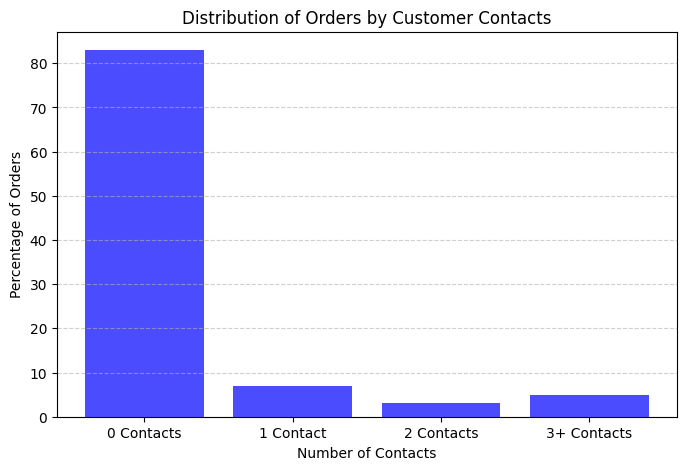

In [16]:

# Distribution of orders by customer contacts
import matplotlib.pyplot as plt

data = {
    'Contacts': ['0 Contacts', '1 Contact', '2 Contacts', '3+ Contacts'],
    'Percentage': [83, 7, 3, 5]
}

plt.figure(figsize=(8, 5))
plt.bar(data['Contacts'], data['Percentage'], color='blue', alpha=0.7)
plt.title('Distribution of Orders by Customer Contacts')
plt.ylabel('Percentage of Orders')
plt.xlabel('Number of Contacts')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


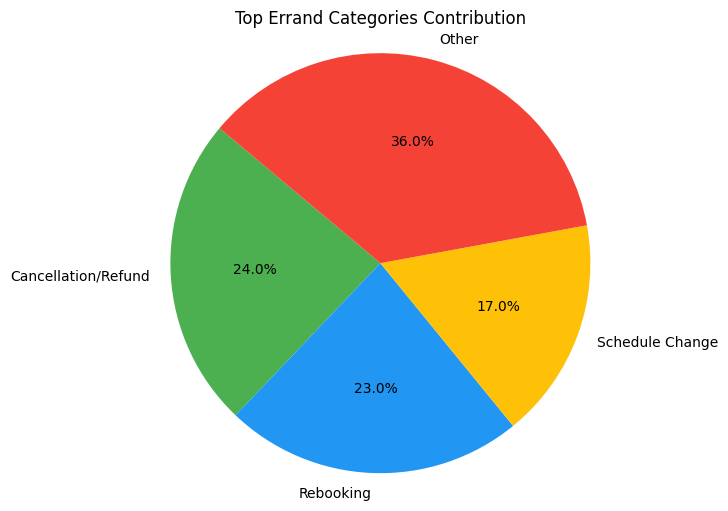

In [17]:

# Errand categories contribution
categories = ['Cancellation/Refund', 'Rebooking', 'Schedule Change', 'Other']
percentages = [24, 23, 17, 36]

plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#2196F3', '#FFC107', '#F44336'])
plt.title('Top Errand Categories Contribution')
plt.axis('equal')
plt.show()


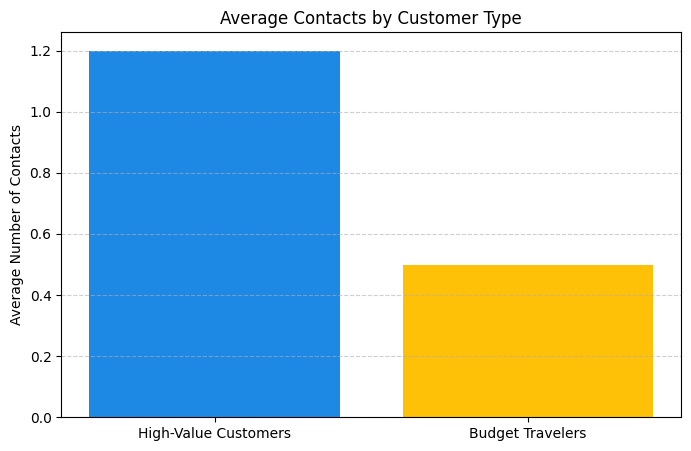

In [18]:

# High-value vs budget travelers
customer_types = ['High-Value Customers', 'Budget Travelers']
avg_contacts = [1.2, 0.5]

plt.figure(figsize=(8, 5))
plt.bar(customer_types, avg_contacts, color=['#1E88E5', '#FFC107'])
plt.title('Average Contacts by Customer Type')
plt.ylabel('Average Number of Contacts')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


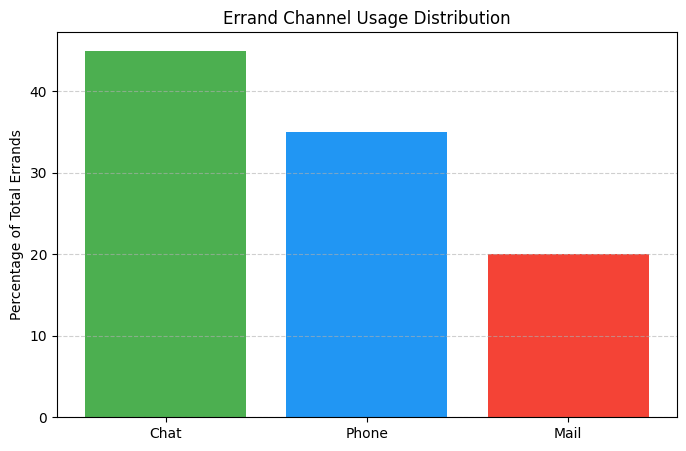

In [19]:

# Errand channel usage
channels = ['Chat', 'Phone', 'Mail']
usage = [45, 35, 20]

plt.figure(figsize=(8, 5))
plt.bar(channels, usage, color=['#4CAF50', '#2196F3', '#F44336'])
plt.title('Errand Channel Usage Distribution')
plt.ylabel('Percentage of Total Errands')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


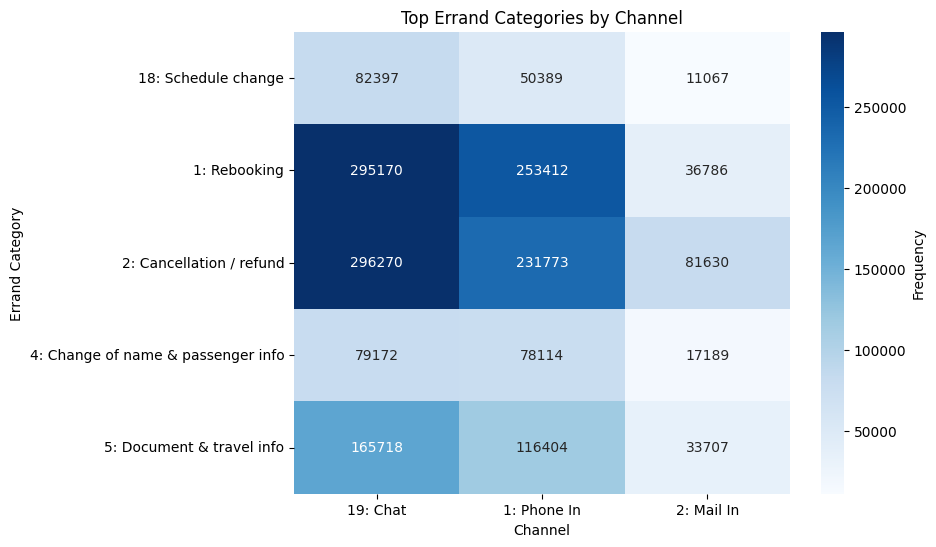

In [22]:
import seaborn as sns

# Calculate the top 5 errand categories
top_categories = errands_ml['errand_category'].value_counts().nlargest(5).index

# Calculate the top 3 channels
top_channels = errands_ml['errand_channel'].value_counts().nlargest(3).index

# Filter the data for the top categories and channels
filtered_data = errands_ml[
    (errands_ml['errand_category'].isin(top_categories)) &
    (errands_ml['errand_channel'].isin(top_channels))
]

# Pivot the data to create a matrix of Errand_category by Errand_channel
heatmap_data = filtered_data.pivot_table(
    index='errand_category',
    columns='errand_channel',
    values='order_id',
    aggfunc='count',
    fill_value=0
)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Blues", cbar_kws={'label': 'Frequency'})
plt.title("Top Errand Categories by Channel")
plt.xlabel("Channel")
plt.ylabel("Errand Category")
plt.show()
